In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
dataframe = pd.read_csv("aviation-accidents.csv")
dataframe

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [2]:
def clean_aviation_data(df):
    # Replace “unknown,” “date unk.”, “Unknown country” with NaN
    unknown_values = ["unknown", "date unk.", "Unknown country"]
    df.replace(unknown_values, np.nan, inplace=True)

    # Convert 'fatalities' to numeric (forcing errors to NaN).
    df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')

    # Remove leading and trailing whitespace in text values.
    df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

    # Show the number of missing values after cleaning.
    print("Missing values after cleaning:")
    print(df.isnull().sum())

    return df

# Example of use:
# df = clean_aviation_data(df)


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [4]:
df = clean_aviation_data(dataframe)
dataframe



Missing values after cleaning:
date              61
type              34
registration    1548
operator           4
fatalities      4291
location        1220
country          838
cat                0
year              61
dtype: int64


,date,type,registration,operator,fatalities,location,country,cat,year
0,NaN,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,NaN,U1,NaN
1,NaN,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,NaN,U1,NaN
2,NaN,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,NaN,U1,NaN
3,NaN,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,NaN
4,NaN,Antonov An-12BP,CCCP-11815,Soviet AF,0.0,Massawa Airport ...,Eritrea,A1,NaN
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0.0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0.0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0.0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0.0,Luxembourg-Finde...,Luxembourg,A2,2023


In [5]:
dataframe.dropna(inplace=True)
dataframe.reset_index(drop=True)

,date,type,registration,operator,fatalities,location,country,cat,year
0,11-AUG-1919,Felixstowe Fury,N123,RAF,1.0,near Felixtowe RNAS,U.K.,A1,1919
1,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0.0,"Acadia Siding, C...",South Africa,A1,1920
2,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0.0,near El Shereik,Sudan,A1,1920
3,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0.0,ÃstanÃ¥,Sweden,A1,1920
4,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4.0,Golders Green,U.K.,A1,1920
...,...,...,...,...,...,...,...,...,...
18220,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0.0,Maleo Airport (MOH),Indonesia,A2,2023
18221,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0.0,Fentheik Airstrip,Indonesia,A2,2023
18222,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0.0,Kampala-Kajjansi...,Uganda,A1,2023
18223,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0.0,Luxembourg-Finde...,Luxembourg,A2,2023


In [6]:
def plot_accident_trends(df):
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df.dropna(subset=['date'], inplace=True)
    df['weekday'] = df['date'].dt.day_name()
    df['year'] = df['date'].dt.year

    # Accidents by day of the week
    weekday_counts = df['weekday'].value_counts()
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_counts = weekday_counts.reindex(weekday_order)

    # Accidents before and after September 11, 2001
    df['post_9_11'] = df['date'] >= '2001-09-11'
    yearly_counts = df.groupby(['year', 'post_9_11']).size().unstack()

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Accident graph by day of the week.
    axes[0].bar(weekday_counts.index, weekday_counts.values, color='skyblue')
    axes[0].set_title("Accidents by day of the week")
    axes[0].set_xlabel("Day of the week")
    axes[0].set_ylabel("Number of accidents")
    axes[0].tick_params(axis='x', rotation=45)

    # Pre- and post-9/11 accident graph.
    yearly_counts.plot(kind='line', marker='o', ax=axes[1])
    axes[1].set_title("Pre- and post-September 11, 2001 aviation accidents")
    axes[1].set_xlabel("Year")
    axes[1].set_ylabel("Number of accidents")
    axes[1].legend(["Pre 11/09/2001", "Post 11/09/2001"])

    plt.tight_layout()
    plt.show()

    # Example of use:
    # df = plot_accident_trends(df)

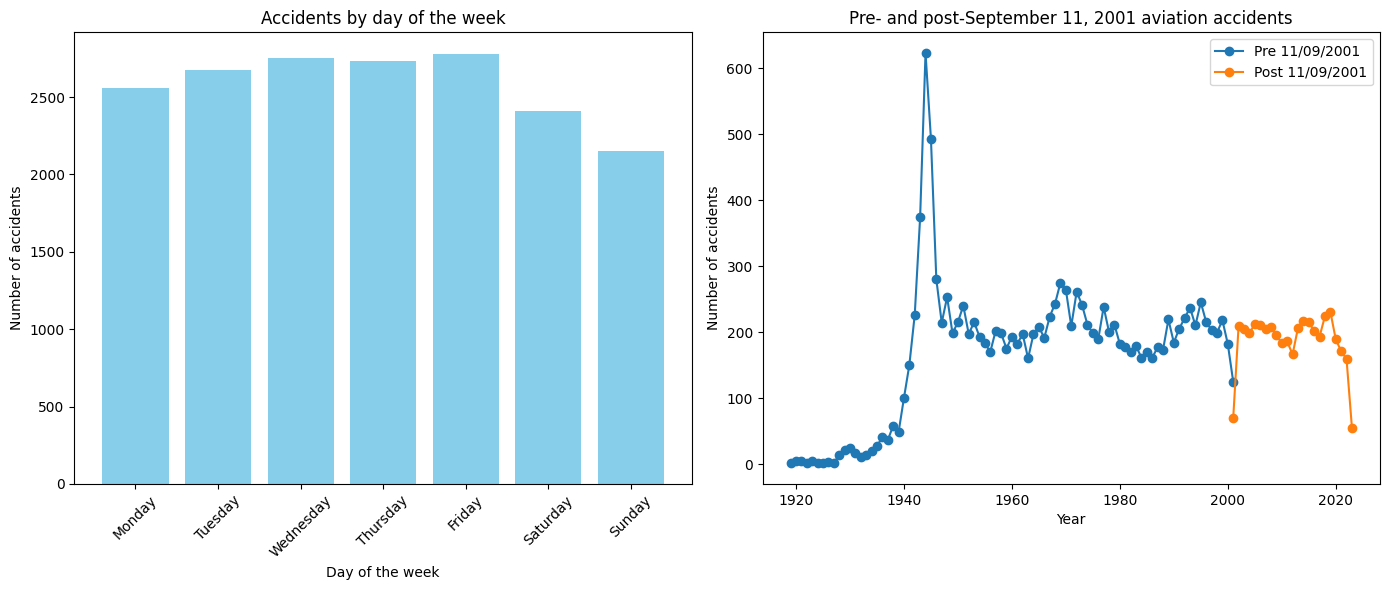

In [14]:
plot_accident_trends(dataframe)

In [8]:
def plot_safety_analysis(df):
    operator_counts = df['operator'].value_counts()
    top_operators = operator_counts[operator_counts >= 50].head(20)
    bottom_operators = operator_counts[operator_counts >= 10].tail(20)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Graphing operators with multiple accidents.
    # Considering at least 50 incidents
    axes[0].barh(top_operators.index, top_operators.values, color='red')
    axes[0].set_title("Less safe operators")
    axes[0].set_xlabel("Number of Accidents")
    axes[0].set_ylabel("Operators")

    # Graphing operators with fewer accidents.
    # Considering at least 10 accidents
    axes[1].barh(bottom_operators.index, bottom_operators.values, color='green')
    axes[1].set_title("Safest operators")
    axes[1].set_xlabel("Number of Accidents")
    axes[1].set_ylabel("Operators")
    axes[1].set_xlim(0,20)


    plt.tight_layout()
    plt.show()

    # Example of use:
    # df = plot_safety_analysis(df)

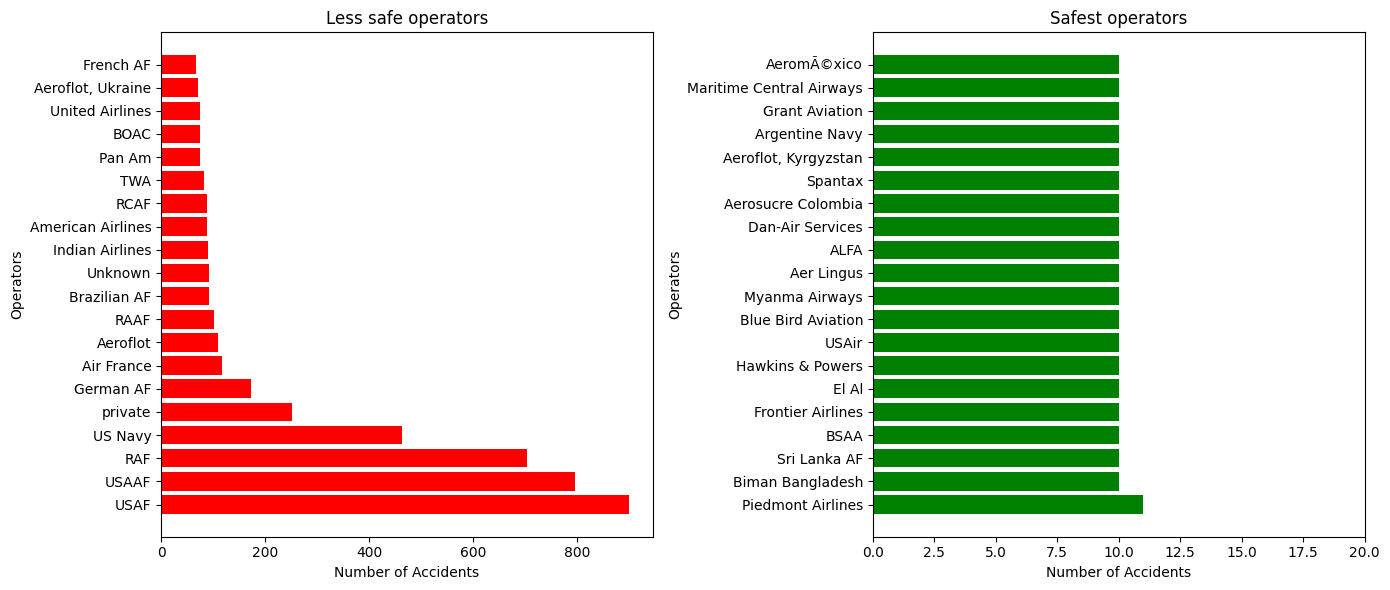

In [9]:
plot_safety_analysis(dataframe)

In [10]:
def plot_accidents_by_country(df, top_n=10):
    country_counts = df['country'].value_counts().head(top_n)
    aircraft_fatalities = df.groupby('type')['fatalities'].sum().sort_values(ascending=False).head(10)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Accident graph by country.
    axes[0].bar(country_counts.index, country_counts.values, color='skyblue')
    axes[0].set_xlabel("Country")
    axes[0].set_ylabel("Number of Accidents")
    axes[0].set_title(f"Top {top_n} Country with the Most Aircraft Accidents")
    axes[0].tick_params(axis='x', rotation=45)

    # Graph aircraft types with the most deaths.
    axes[1].barh(aircraft_fatalities.index, aircraft_fatalities.values, color='red')
    axes[1].set_xlabel("Number of Deaths")
    axes[1].set_ylabel("Aircraft Type")
    axes[1].set_title("Aircraft Types with Multiple Deaths")

    plt.tight_layout()
    plt.show()

    # Example of use:
    # df = plot_accidents_by_country(df, top_n=10)

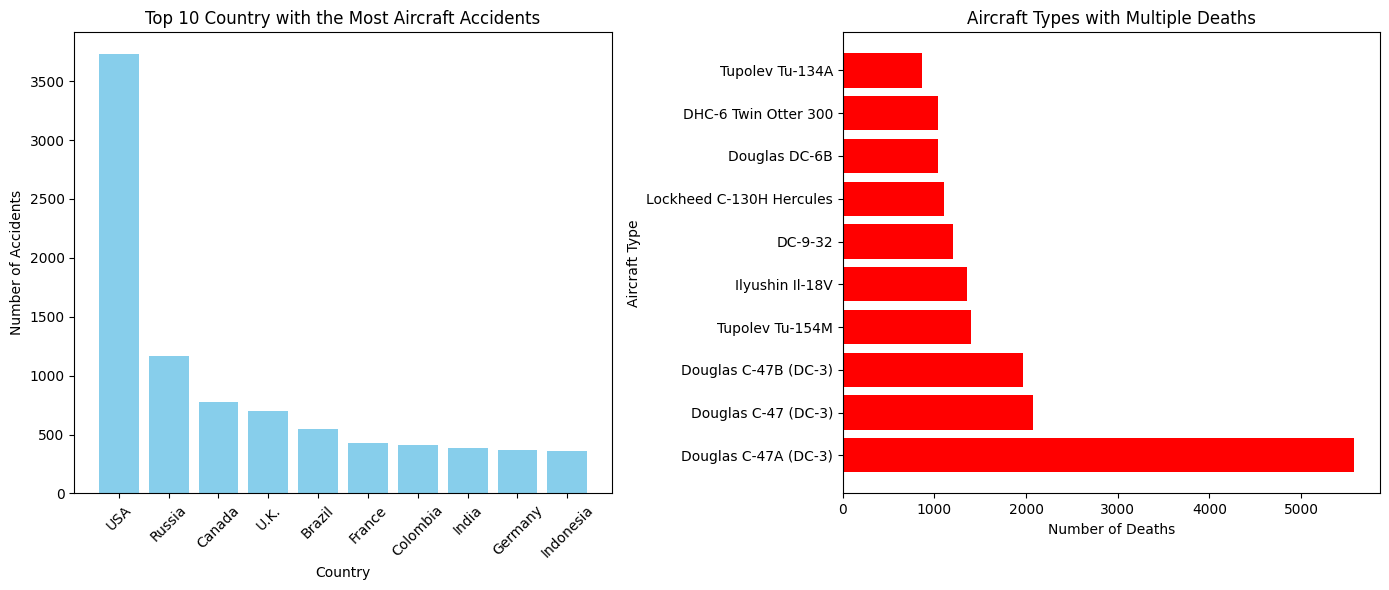

In [11]:
plot_accidents_by_country(dataframe)

In [15]:

def plot_accidents_cartogram(df):

    # Download the Natural Earth dataset.
    world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

    country_counts = df['country'].value_counts().reset_index()
    country_counts.columns = ['country', 'accidents']

    # Correct country names to match the geographic dataset.
    country_corrections = {
        "USA": "United States of America",
        "U.K.": "United Kingdom",
    }
    country_counts['country'] = country_counts['country'].replace(country_corrections)

    world = world.merge(country_counts, left_on='NAME', right_on='country', how='left')
    world = world.infer_objects(copy=False)  # Converts objects into appropriate types
    world['accidents'] = world['accidents'].fillna(0)  # Fills NaN with 0 only for column 'accidents'

    fig, ax = plt.subplots(figsize=(15, 8))
    world.plot(column='accidents', cmap='Reds', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
    ax.set_title("Number of aviation accidents by Country")

    plt.show()

def top_five_countries(df):
    top_countries = df['country'].value_counts().head(5)
    print("Countries by Number of Accidents:")
    print(f"Top 5 {top_countries}")


    # Example of use:
    # plot_accidents_cartogram(df)
    # top_five_countries(df)



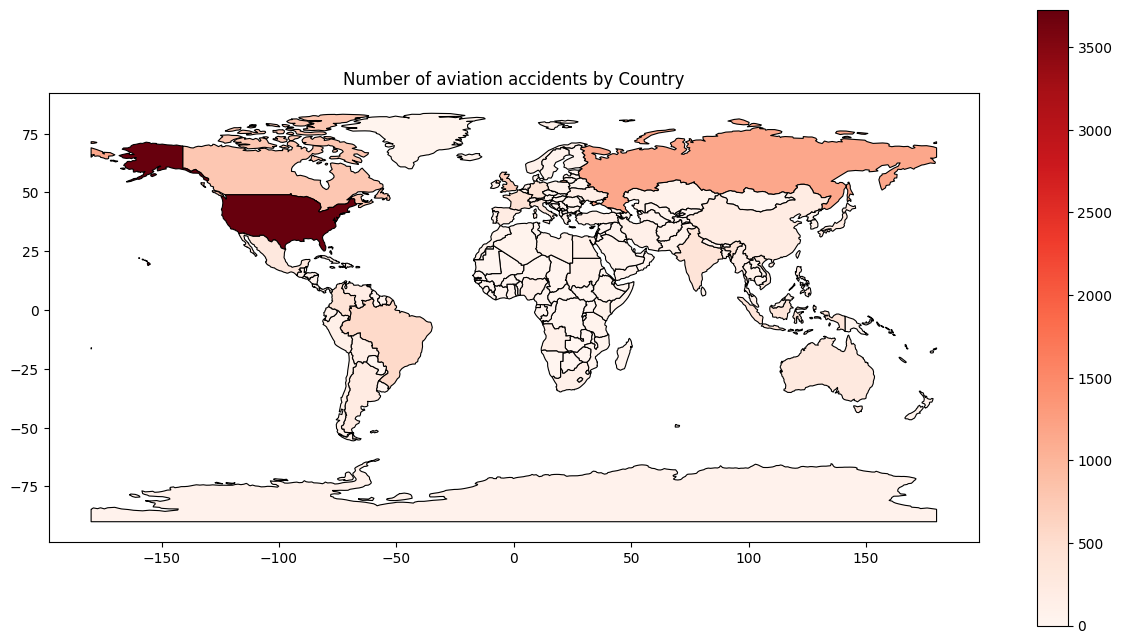

Countries by Number of Accidents:
Top 5 country
USA       3728
Russia    1164
Canada     776
U.K.       699
Brazil     549
Name: count, dtype: int64


In [16]:
plot_accidents_cartogram(dataframe)
top_five_countries(dataframe)